# TP4 Data Analysis : Clustering // Rousseau Matthieu - Antoine Marvier

This TP was realized in Python. 

We used :

- pandas to manipulate the dataset
- matplotlib to plot the data
- numpy to performed calculations on arrays
- sklearn to perfom decomposition, PCA, Kmeans, Silhouette, scale data, 

## Exercice A


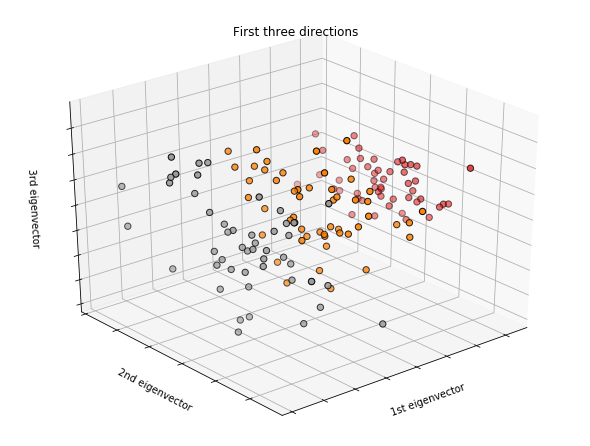

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.metrics.cluster import contingency_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


#Let's visualize the dataset in 3D

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=130)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### 1. Load the dataset

In [88]:
# Load the Iris Dataset

df_iris = pd.read_csv('iris.csv')

### 2. Separate the dataset in two parts : 



*   X contains the Iris's features
*   Y contains the labels

In [89]:
# X = 4 iris's feature // Y = iris Class

X = df_iris.drop(['Class'],axis=1)
Y = df_iris['Class']
Y.columns=['Class']

# Scale the dataset and convert it to pandas dataframe

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)

### 3. We compute the PCA and store it into a dataframe : df_iris_PCA

In [90]:
# We store the loss due to the passage in two dimensions

pca = PCA(n_components=2)
pca.fit_transform(X)
loss =(1-pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100

In [91]:
PCA_val = pca.fit_transform(X)


# df_iris_PCA is a dataframe with 2 features  : PC1/PC2
df_iris_PCA = pd.DataFrame(data = PCA_val,columns = ['PC1', 'PC2'])

# df_iris_PCA is a dataframe with 3 features  : PC1/PC2/Class
df_iris_PCA_class = pd.concat([df_iris_PCA, Y], axis = 1)

df_iris_PCA.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


### 4. We compute the Kmeans algorithme on our dataframe df_iris_PCA


In [92]:
# Kmeans on the df_iris_PCA dataset using sklearn

kmeans = KMeans(n_clusters=3, random_state=0
                ,n_init=5, max_iter=300).fit(df_iris_PCA.iloc[:,:2])
kmeans.score(df_iris_PCA.iloc[:,:2])

# Creation of a dataframe with theorical class and predicted

prediction = kmeans.predict(df_iris_PCA.iloc[:,:2])
prediction = pd.DataFrame(prediction)
prediction = pd.concat([df_iris_PCA, prediction,Y], axis=1, ignore_index=True)
prediction.columns=['PC1','PC2','Theoretical','Predicted']
prediction = prediction.replace(0, "setosa")
prediction = prediction.replace(2, "virginica")
prediction = prediction.replace(1, "versicolor")

centroid = kmeans.cluster_centers_

print("Centroid : ", centroid)

prediction.head()



Centroid :  [[-2.22019328  0.29222482]
 [ 0.56713803 -0.8076751 ]
 [ 1.72236912  0.59990509]]


,PC1,PC2,Theoretical,Predicted
0,-2.264542,0.505704,setosa,setosa
1,-2.086426,-0.655405,setosa,setosa
2,-2.367950,-0.318477,setosa,setosa
3,-2.304197,-0.575368,setosa,setosa
4,-2.388777,0.674767,setosa,setosa


### 5.Repeat the algorithm

In our case, we specified in the kmeans function of sklearn to repeat 5x the same algorithm while keeping the best model (parameter n_init). So our model is still the same. However, by setting n_init to 1, the result changes each time.

In [93]:
contigency_matrix = contingency_matrix(prediction['Theoretical'],prediction['Predicted'])
contigency_matrix = pd.DataFrame(contigency_matrix)
contigency_matrix.columns=['setosa' ,'versicolor' ,'virginica']
contigency_matrix.rows=['setosa' ,'versicolor' ,'virginica']

well_corrected = prediction['Predicted']


# Print the pourcentage of correct predictions

count = 0
for i in range (0,prediction.shape[0]):
  if prediction.iloc[i,2]==prediction.iloc[i,3]:
    count +=1
    well_corrected[i,0] = prediction.iloc[i,2]
  else:
    well_corrected[i,0] = "error" 
print('Pourcentage de bonnes prédictions : ', (count/prediction.shape[0])*100,'%')


Pourcentage de bonnes prédictions :  83.33333333333334 %


In [94]:
prediction = pd.concat([prediction, well_corrected], axis=1, ignore_index=True)
prediction.columns=['PC1','PC2','Theoretical','Predicted','Similarity']
prediction.head()

,PC1,PC2,Theoretical,Predicted,Similarity
0,-2.264542,0.505704,setosa,error,error
1,-2.086426,-0.655405,setosa,setosa,setosa
2,-2.367950,-0.318477,setosa,setosa,setosa
3,-2.304197,-0.575368,setosa,setosa,setosa
4,-2.388777,0.674767,setosa,setosa,setosa


83,33% of the samples were well classified when we compare them to the theoretical labels Y.


### 6. Plot the result

Now we can plot the result. You can see in red the misclassified data and the blue stars represents the centroid



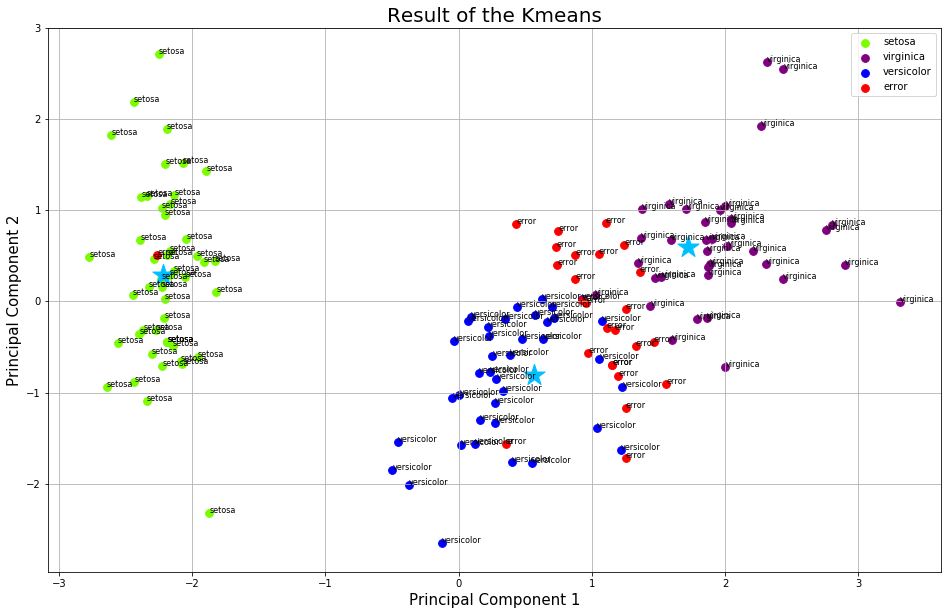

In [95]:
# We plot the result

fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Result of the Kmeans', fontsize = 20)
targets = ['setosa','virginica','versicolor','error']
colors = ['lawngreen', 'purple', 'b','r']

for target, color in zip(targets,colors):
  
    indicesToKeep = prediction['Similarity'] == target
    ax.scatter(prediction.loc[indicesToKeep, 'PC1']
               , prediction.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 60)


for i in range(0,prediction['Similarity'].shape[0]):
    ax.annotate(prediction.iloc[i,4], (prediction.iloc[i,0], 
                                       prediction.iloc[i,1]),fontsize=8)
         
plt.scatter(centroid[0,0],centroid[0,1], label='True Position',marker='*',
            c = 'deepskyblue',s =500)
plt.scatter(centroid[1,0],centroid[1,1], label='True Position',marker='*',
            c = 'deepskyblue',s =500)
plt.scatter(centroid[2,0],centroid[2,1], label='True Position',marker='*',
            c = 'deepskyblue',s =500)


ax.legend(targets)
ax.grid()


### 7. Table of contingency

In [96]:
contigency_matrix

,setosa,versicolor,virginica
0,50,0,0
1,0,39,14
2,0,11,36


125 data have been classified, but there is some confusion between Virginica and Versicolor. Let's see what the silhouette diagram can tell us

For n_clusters = 3 The average silhouette_score is : 0.5038950147983078


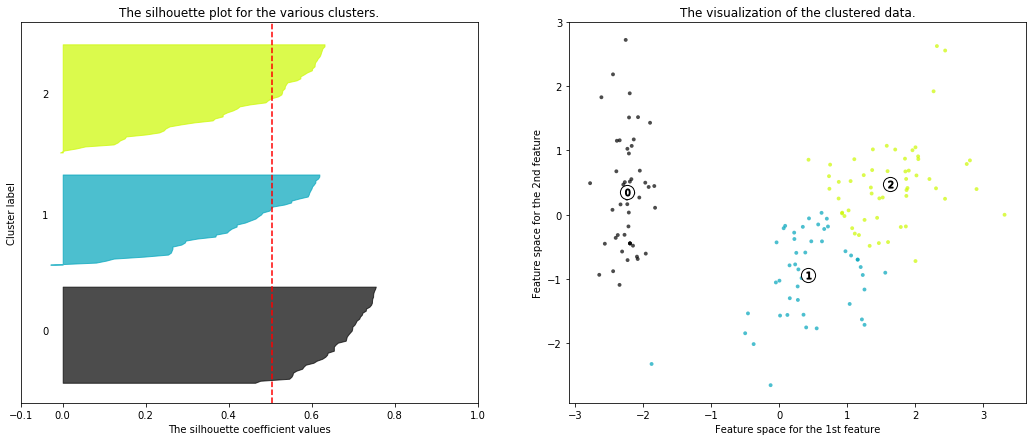

In [97]:
def silhouette_kmeans(X,range_n):
  
  range_n_clusters = range_n

  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, random_state=10)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)



      y_lower = 10


      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=60, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                  c="white", alpha=1, s=200, edgecolor='k')

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                      s=50, edgecolor='k')

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")
      
      return 
      
silhouette_kmeans(df_iris_PCA.iloc[:,:2],[3])

Again, we notice a significant confusion between clusters 2 and 3 which is not surprising because when we observe the 2D projection, a lot of data is blended between these two clusters. This is the limit of 2D analysis. Let's see if our performance is better in 4D.

### 9. Let's start again but this time with the  original data  instead of the projected ones

In [98]:
# Kmeans on the df_iris_PCA dataset using sklearn
df=pd.read_csv('iris.csv')

kmeans = KMeans(n_clusters=3, random_state=0,n_init=5
                , max_iter=300).fit(df.drop(['Class'],axis=1))

# Creation of a dataframe with theorical class and predicted

prediction2 = kmeans.predict(df.drop(['Class'],axis=1))
prediction2 = pd.DataFrame(prediction2)
prediction2 = pd.concat([X,Y, prediction2], axis=1, ignore_index=True)
prediction2.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth',
                     'Theoretical','Predicted']

prediction2['Theoretical'] = prediction2['Theoretical'].replace(0, "setosa")
prediction2['Theoretical'] = prediction2['Theoretical'].replace(2, "virginica")
prediction2['Theoretical'] = prediction2['Theoretical'].replace(1, "versicolor")
prediction2['Predicted'] = prediction2['Predicted'].replace(1, "setosa")
prediction2['Predicted'] = prediction2['Predicted'].replace(2, "virginica")
prediction2['Predicted'] = prediction2['Predicted'].replace(0, "versicolor")

prediction2.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Theoretical,Predicted
0,-0.900681,1.032057,-1.341272,-1.312977,setosa,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa,setosa


In [99]:
contigency_matrix2 = contingency_matrix(prediction2['Theoretical']
                                        ,prediction2['Predicted'])


# Print the pourcentage of correct predictions

count = 0
for i in range (0,prediction2.shape[0]):
  if prediction2.iloc[i,4]==prediction2.iloc[i,5]:
    count +=1
    well_corrected[i,0] = prediction2.iloc[i,4]
  else:
    well_corrected[i,0] = "error" 
    
print('Pourcentage de bonnes prédictions : ',(count/prediction2.shape[0])*100,'%')

prediction2 = pd.concat([prediction2, well_corrected], axis=1, ignore_index=True)
prediction2.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth',
                     'Theoretical','Predicted','Similarity']


Pourcentage de bonnes prédictions :  89.33333333333333 %


For n_clusters = 3 The average silhouette_score is : 0.5525919445499757


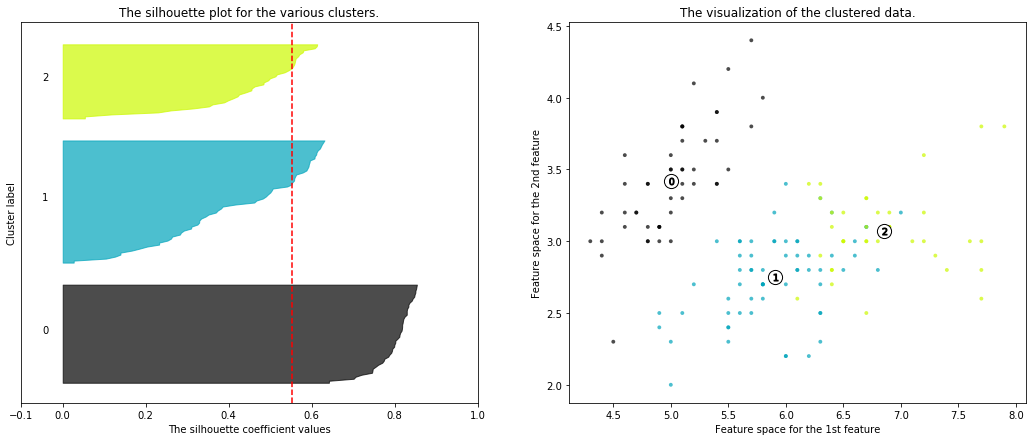

In [100]:
silhouette_kmeans(df.drop(['Class'],axis=1),[3])

Conclusion : Silhouette indicates an increase of 0.5 (0.50 -> 0.55). 
This means that our clustering has better performance than the one studied above. 
This is normal, by applying a principal component analysis to our data, we lose in variance (loss of 5% noticed previously) which impacts our clustering. 
Working in 2D therefore allows us to visualize our data and accelerate the processing time, but it leads us to error because it does not allow us to distinguish the distance between each point in 4D. 


# Exercice B

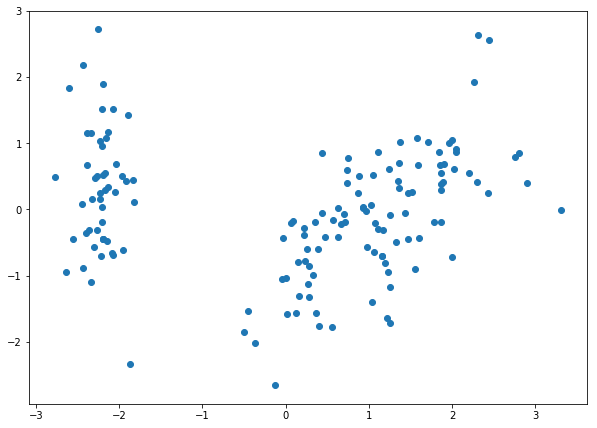

In [101]:
# Plot df_iris_PCA
X = df_iris.drop(['Class'],axis=1)
Y = df_iris['Class']
Y.columns=['Class']

# Scale the dataset and convert it to pandas dataframe

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)

plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(df_iris_PCA.iloc[:,0],df_iris_PCA.iloc[:,1], label='True Position')
    
plt.show()  

### 1. Parameters of the function

In our case, we use the dendogram function from sklearn : linkage returns the hierarchical clustering encoded as a linkage matrix.

Parameters : n_clusters=3, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’average’, pooling_func=’deprecated’

In our case, we use the ward method

### 2. Hierarchical clustering complete

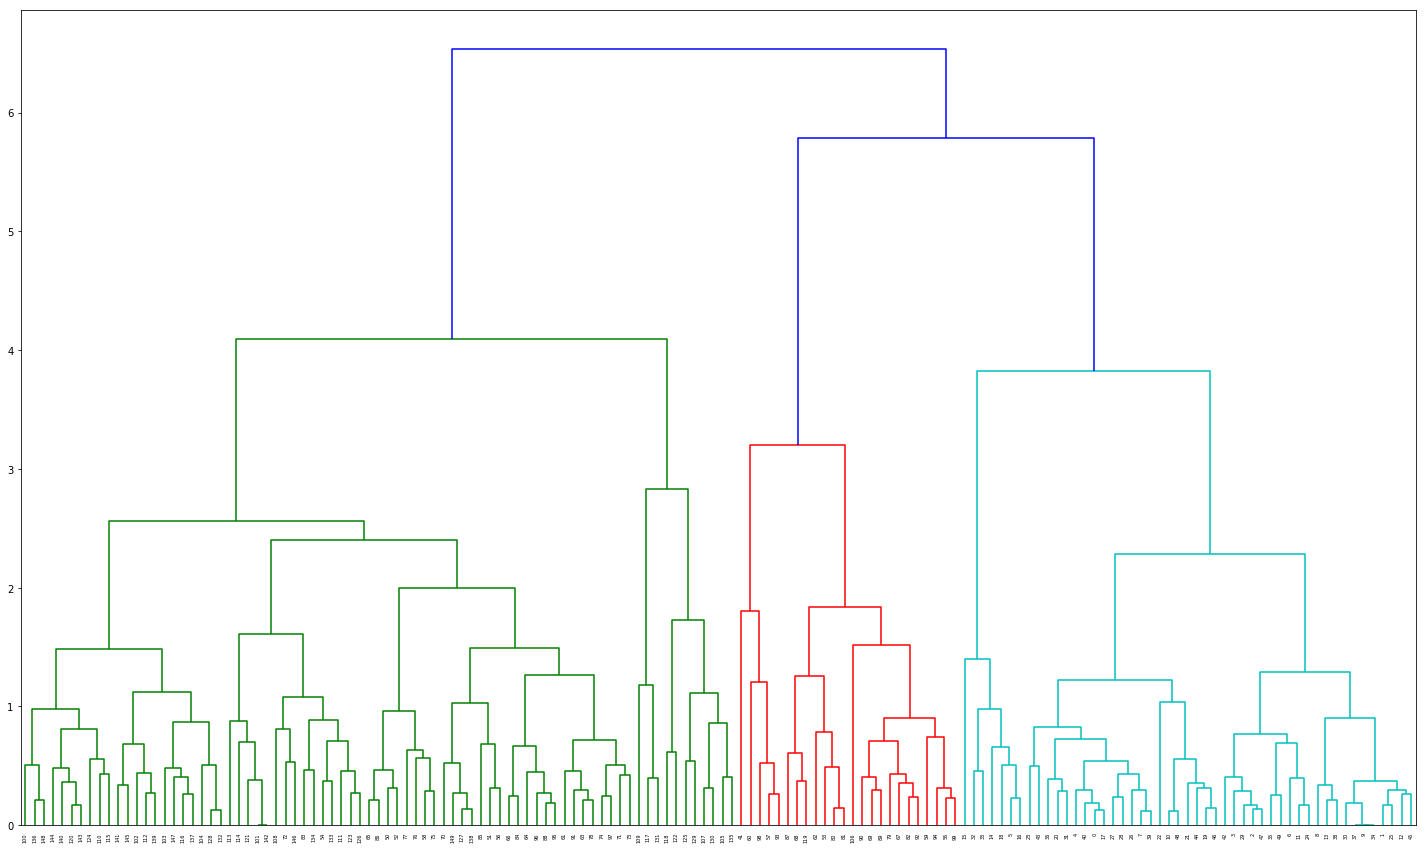

In [102]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering


linked_complete = linkage(X, 'complete')


plt.figure(figsize=(25, 15))  

dendrogram(linked_complete,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                  linkage='complete')  
cluster.fit_predict(X) 
cluster_predict_complete = pd.DataFrame(cluster.labels_)  

prediction3 = pd.concat([X,Y, cluster_predict_complete],
                        axis=1, ignore_index=True)
prediction3.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth',
                     'Theoretical','Predicted']


prediction3['Predicted'] = prediction3['Predicted'].replace(1, "setosa")
prediction3['Predicted'] = prediction3['Predicted'].replace(0, "virginica")
prediction3['Predicted'] = prediction3['Predicted'].replace(2, "versicolor")




### 4. Contingency Table

In [103]:
contigency_matrix_hc = contingency_matrix(prediction3['Theoretical']
                                        ,prediction3['Predicted'])
contigency_matrix_hc = pd.DataFrame(contigency_matrix_hc)
contigency_matrix_hc.columns=['0','1','2']
contigency_matrix_hc.rows=['0','1','2']
contigency_matrix_hc

,0,1,2
0,49,1,0
1,0,21,29
2,0,2,48


### 5. Start again with an average link

In [104]:
cluster_av = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                  linkage='average')  
cluster_av.fit_predict(X) 
cluster_av_predict_average = pd.DataFrame(cluster_av.labels_)  

prediction_av = pd.concat([X,Y, cluster_av_predict_average],
                        axis=1, ignore_index=True)
prediction_av.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth',
                     'Theoretical','Predicted']


prediction_av['Predicted'] = prediction_av['Predicted'].replace(0, "setosa")
prediction_av['Predicted'] = prediction_av['Predicted'].replace(1, "virginica")
prediction_av['Predicted'] = prediction_av['Predicted'].replace(2, "versicolor")
prediction_av.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Theoretical,Predicted
0,-0.900681,1.032057,-1.341272,-1.312977,setosa,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa,setosa


In [105]:
contigency_matrix_av = contingency_matrix(prediction_av['Theoretical']
                                        ,prediction_av['Predicted'])
contigency_matrix_av = pd.DataFrame(contigency_matrix_av)
contigency_matrix_av.columns=['0','1','2']
contigency_matrix_av.rows=['0','1','2']
contigency_matrix_av

,0,1,2
0,50,0,0
1,0,0,50
2,0,3,47


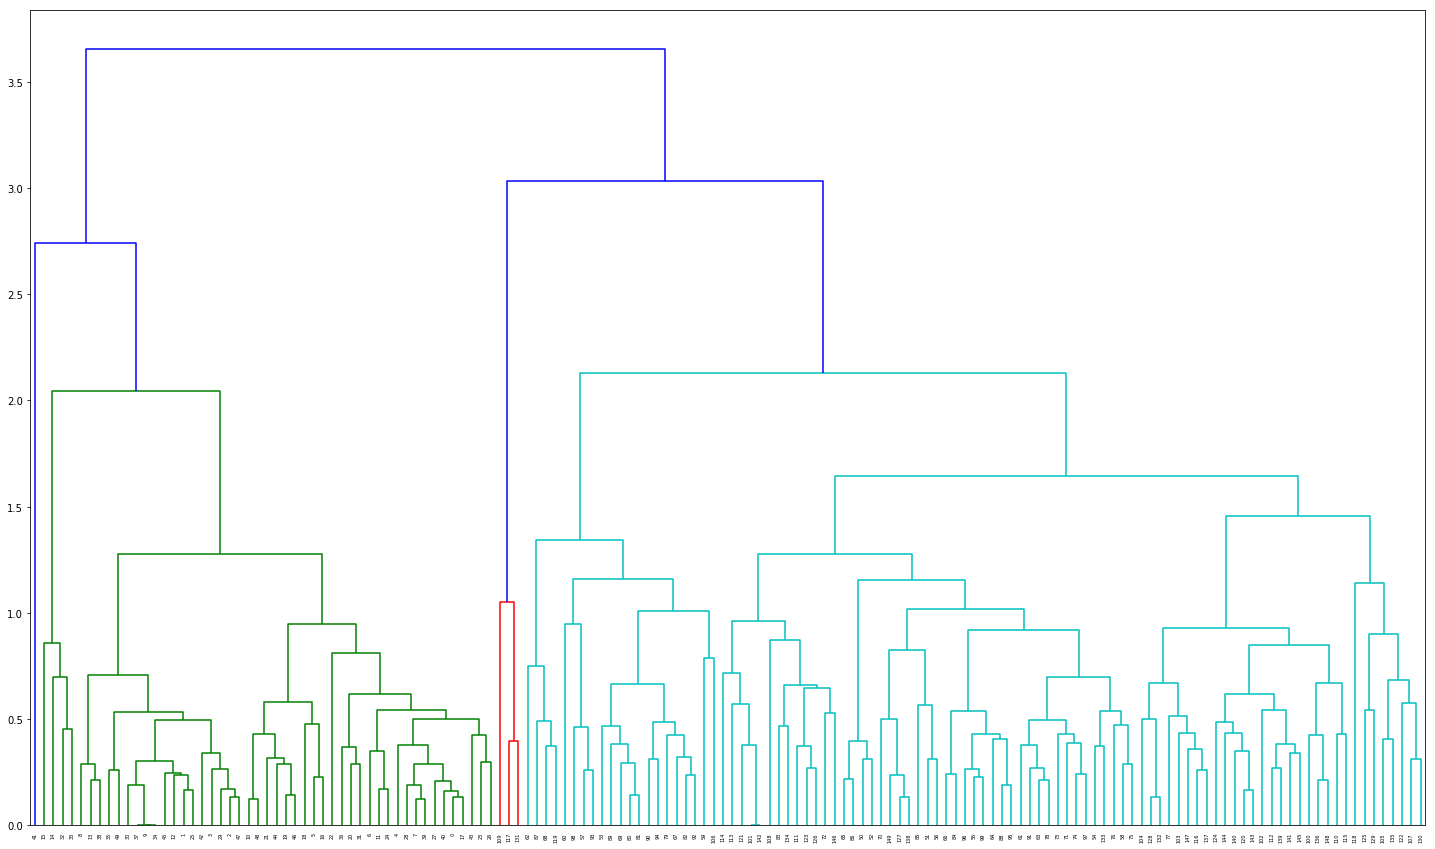

,PC1,PC2,Predicted
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


In [106]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'average')


plt.figure(figsize=(25, 15))  

dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean'
                                  , linkage='average')  
cluster.fit_predict(X) 
cluster_predict = pd.DataFrame(cluster.labels_)  

prediction = pd.concat([df_iris_PCA, cluster_predict], axis=1, ignore_index=True)
prediction.columns=['PC1','PC2','Predicted']
prediction.head()

### 6. Silhouette indexes for both link

For n_clusters = 3 The average silhouette_score is : 0.4487911772434676


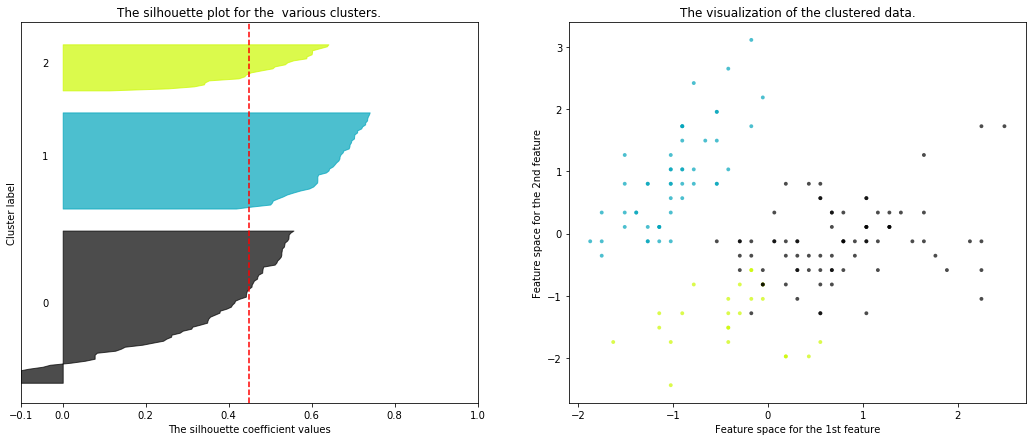

In [107]:
def silhouette_hierachical(X,range_n,link):
  
  range_n_clusters = range_n

  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = AgglomerativeClustering(n_clusters=3, affinity='euclidean'
                                  , linkage=link)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # avpute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)



      y_lower = 10


      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the  various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=60, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')

     

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")
      
      return 
      
silhouette_hierachical(X,[3],'complete')

For n_clusters = 3 The average silhouette_score is : 0.47945127284080863


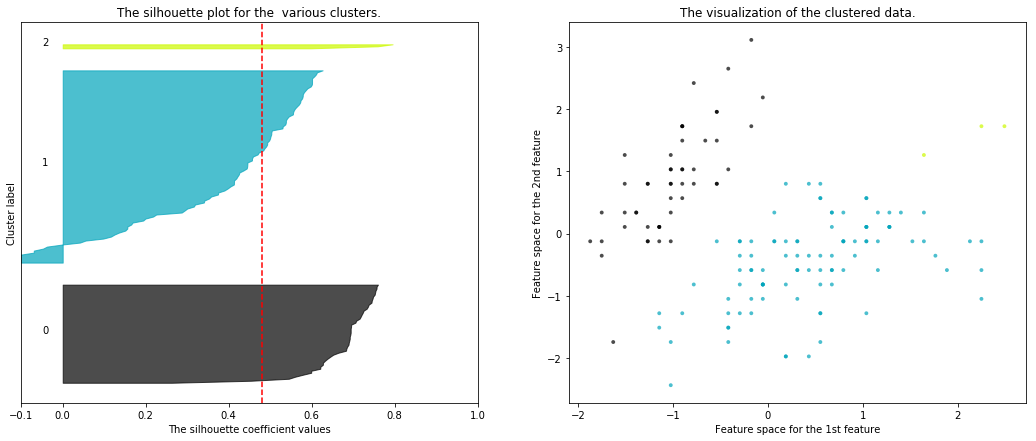

In [108]:
silhouette_hierachical(X,[3],'average')

Conclusion : So the silhouette confirm what we guess before, the average linked is giving a better modelisation than the complet one.
Despite the number of points in each clusters closer to the theoricals values is bigger in the case of the average linked.

In our case it's appeared to be logical because the complete linked method is more sensible to the outlier or extremes poinst contrary to the average linked which is based on the distance between the centroid.



# Exercice C

### 1. Load the dataset and drop the last column


In [109]:
import pandas as pd

df_exo4_atm_extr = pd.read_csv('exo4_atm_extr.csv',sep=";")

X = df_exo4_atm_extr.drop(['Type'],axis=1)
Y = df_exo4_atm_extr['Type']
Y.columns=['Type']
X.head()

,PH2O,PHe,PCH4,PH2,PN2,PNH3,PO2,PAr,PCO2,PSO2,PK
0,0.0,8.7,1.3,87.30,0.0,2.70,0.0,0.0,0.0,0.0,0.00
1,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02
2,0.1,7.1,1.7,86.45,0.0,1.15,0.0,0.0,0.0,3.5,0.00
3,0.0,2.7,0.0,3.70,41.5,0.00,31.3,6.6,14.2,0.0,0.00
4,0.1,11.4,1.1,86.10,0.0,0.20,0.0,0.0,0.0,1.1,0.00


### 2. Define the property of Davies Boudlin 

The David-Bouldin index aims to estimate the quality of a clustering for a data set. First of all, it should be stressed that in order to have a quality clustering, we try to minimize the distances between the barycentre of each cluster and the different points containing them and by maximizing the distance between the barycentres of the different clusters. Indeed, these two criteria underline that the points of each cluser seem to have an important link and that our different clustering have many remarkable differences. On this principle, the Davies-Bouldin index corresponds to the ratio of these two elements (average distance of the points to the clustering barycentre, and inter-barycentre distances between the different clusters).

### 3. Find the best solution  

We want to determine the best number of clusters, to do that we are going to use the Davies-Bouldin indice. 

We are going to use the K-means for 2 to 10 clusters and calculate the Davies-Bouldin indice every time and see when it is the smaller. 

In [110]:
import warnings
warnings.filterwarnings("ignore")

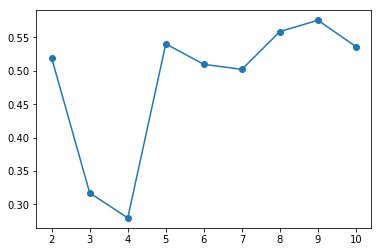

In [111]:
from sklearn.metrics import davies_bouldin_score

history=[]
for i in range (2,11):
    kmeans = KMeans(n_clusters=i, random_state=1).fit(X)
    labels = kmeans.labels_
    value = davies_bouldin_score(X, labels)
    history.append(value)
x_value =[2,3,4,5,6,7,8,9,10]

plt.plot(x_value,history,'-o')
plt.show()

The Davies Bouldin index is the lowest for 4 clusters

### 4. Comment and explain the result

In [112]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = x_value

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6380862597116921
For n_clusters = 3 The average silhouette_score is : 0.8119493704740116
For n_clusters = 4 The average silhouette_score is : 0.907233993199788
For n_clusters = 5 The average silhouette_score is : 0.8853532248871986
For n_clusters = 6 The average silhouette_score is : 0.8917031332668535
For n_clusters = 7 The average silhouette_score is : 0.8919328095600322
For n_clusters = 8 The average silhouette_score is : 0.7916282011558862
For n_clusters = 9 The average silhouette_score is : 0.7894558399336845
For n_clusters = 10 The average silhouette_score is : 0.7838618275948765


Silhouette confirms that the best number of clusters is 4. 

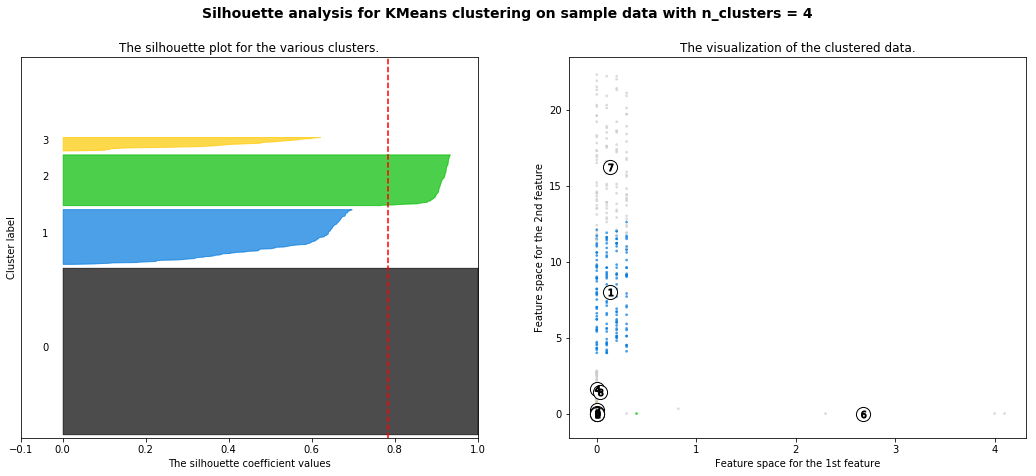

In [113]:
range_n_clusters=[4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Now,we're going to see how many values are classified per custer for n_cluster = 4 and n_cluster = 5. Here, we can see the number of element in each categorie.

In [114]:
Y = pd.DataFrame(Y)
Y.columns=['Class']
Y_count = Y['Class'].value_counts()
Y_count = pd.DataFrame(Y_count)
Y_count.rename(index={0:'r',1:'g',2:'d',3:'i',4:'l'}, inplace=True)
Y_count


,Class
r,460
g,267
d,143
i,126
l,4


Now, let's see how many element are stored in any cluster

In [115]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
cluster_labels = pd.DataFrame(cluster_labels)
cluster_labels.columns=['4 clusters']
cluster_labels = cluster_labels['4 clusters'].value_counts()
cluster_labels = pd.DataFrame(cluster_labels)
cluster_labels

,4 clusters
1,464
2,267
3,143
0,126


Thus we have the confirmation that the use of 4 clusters allows to obtain excellent predictions, in fact only the 4 points of L are integrated into the cluster corresponding to the points of R.

Nevertheless we can see what it looks like if we use 5 clusters which would be perfect because it would eventually take into account L.

Now, let's see for n_cluster= 5.

In [116]:
clusterer = KMeans(n_clusters=5, random_state=10)
cluster_labels = clusterer.fit_predict(X)
cluster_labels = pd.DataFrame(cluster_labels)
cluster_labels.columns=['5 clusters']
cluster_labels = cluster_labels['5 clusters'].value_counts()
cluster_labels = pd.DataFrame(cluster_labels)
cluster_labels.rename(index={0:'r',1:'g',2:'d',3:'i',4:'l'}, inplace=True)
cluster_labels

,5 clusters
g,464
r,267
d,143
l,64
i,62


In [117]:
Y = pd.DataFrame(Y)
Y.columns=['Class']
Y_count = Y['Class'].value_counts()
Y_count = pd.DataFrame(Y_count)
Y_count

,Class
r,460
g,267
d,143
i,126
l,4


Conclusion : By using 5 clusters we realize that the predictions become much worse because more than half of the points that should belong to the cluster of I are confused with the cluster corresponding to L.

Thus, even if we could have thought of the view of the dataset that it would have been logical to observe 5 clusters since there are 5 categories, we have the confirmation that it is by using 4 clusters that the modeling is optimal and the latter is moreover of excellent quality with only 4 points badly palmed on 1000.
